# Example 5 - Data visualization with 3D plot

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colo map

from sympy import symbols, diff
from math import log

%matplotlib inline

## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$
Minimise $$f(x,y) = \frac{1}{r+1}$$ Where $r$ is $3^{-x^2-y^2}$

In [6]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [7]:
# Make your x and y
x_5 = np.linspace(start=-2, stop=2, num=200)
y_5 = np.linspace(start=-2, stop=2, num=200)

print("Shape of x:", x_5.shape)
x_5, y_5 = np.meshgrid(x_5, y_5)
print("Shape of x:", x_5.shape)

Shape of x: (200,)
Shape of x: (200, 200)


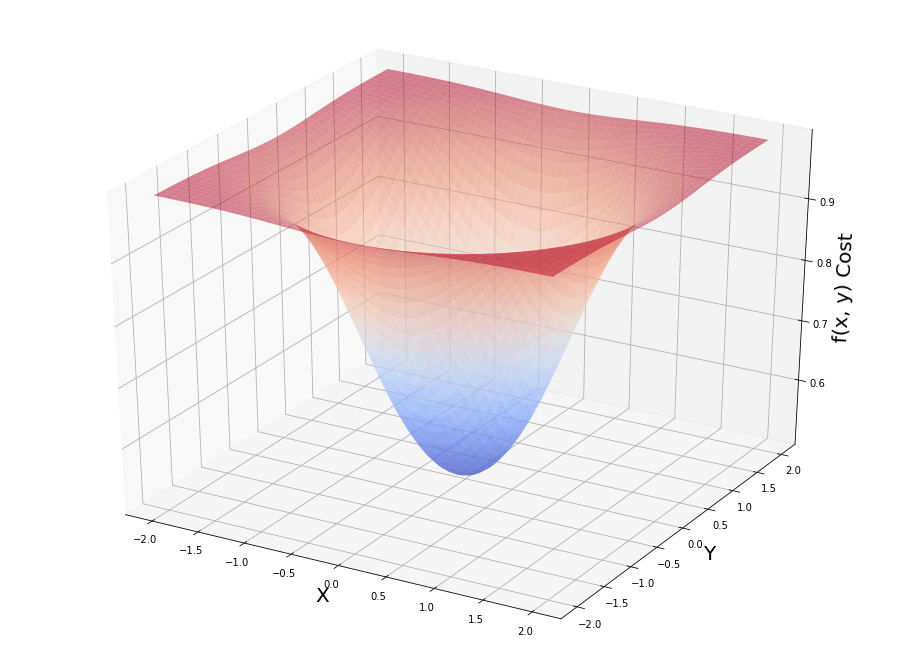

In [8]:
# Generating #D Plot
fig = plt.figure(figsize=[16, 12])
axes = fig.gca(projection='3d')

axes.set_xlabel('X', fontsize=20)
axes.set_ylabel('Y', fontsize=20)
axes.set_zlabel('f(x, y) Cost', fontsize=20)

axes.plot_surface(x_5, y_5, f(x_5, y_5), cmap=cm.coolwarm, alpha=0.5)

plt.show()

## Partial derivatives & Symbolic 

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{\left( 3^{-x^2-y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{\left( 3^{-x^2-y^2} + 1 \right) ^2}$$

In [28]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is:', f(a, b))
print('Partial derivaitives with respect to x is:', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8 & b=1.0 is:', f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value Partial derivaitives with respect to x at x=1.8 & b=1.0 is:',
      diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivaitives with respect to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 & b=1.0 is: 0.990604794032582
Value Partial derivaitives with respect to x at x=1.8 & b=1.0 is: 0.0368089716197505


## Batch Gradient Descent with sympy

In [27]:
#Setup
multiplier=0.1
max_iter=200
params=np.array([1.8, 1.0]) #inital guess

for n in range(max_iter):
    gradient_x=diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y=diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients=np.array([gradient_x, gradient_y])
    params= params - multiplier * gradients

#Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x vaue of:', params[0])
print('Minimum occurs at y vaue of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array: [0.000461440542096373 0.000256355856720208]
Minimum occurs at x vaue of: 0.000793898510134722
Minimum occurs at y vaue of: 0.000441054727852623
The cost is: 0.500000226534985


In [29]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r/(r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r/(r + 1)**2

In [33]:
#Setup
multiplier=0.1
max_iter=500
params=np.array([1.8, 1.0]) #inital guess

for n in range(max_iter):
    gradient_x=fpx(params[0], params[1])
    gradient_y=fpy(params[0], params[1])
    gradients=np.array([gradient_x, gradient_y])
    params= params - multiplier * gradients

#Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x vaue of:', params[0])
print('Minimum occurs at y vaue of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x vaue of: 3.458385998858304e-11
Minimum occurs at y vaue of: 1.9213255549212797e-11
The cost is: 0.5
